# DSTEP20 // Assignment #4

assigned : **Jan 31, 2020**

DUE : **Feb 6, 2020 11:59pm**

## Energy Consumption and Population Characteristics in Chicago

<img src="https://cdnassets.hw.net/fd/79/255c2257450aabb327cc6b1fc648/1219-chicago-hero-tcm20-2182339.jpg" width=500>

---

**The Scenario:** You are working for a non-profit that is consulting with the City of Chicago on future planning for energy distribution needs.  Your team is large and consists of groups that study building characteristics and energy consumption as well as groups that study population predictions and growth estimates.  Taken together, they can create a model for future population growth and infrastructure, but they are missing a key piece of the puzzle: how usage characteristics of the population scales with social and economic factors.  The hypothesis is that there may be link between the two given the link between [energy consumption per person and GDP per capita](https://ourworldindata.org/grapher/energy-use-per-capita-vs-gdp-per-capita) on a global scale.

**The Problem Statement:** Your job is to explore the economic and social dimension of the problem by combining recently released energy consumption data in Chicago with data from the Census on population characteristics by Census Tract <small>(note, the consumption data exists at the census block level, but being well versed in the census, you know that census block estimates have significant uncertainty, and so the decision is made to focus on the Census Tract level)</small>.  As with the last assignment, **the deliverable for this assignment is a complete, end-to-end data science workflow similar to those we've seen before, including 1) Background information on the problem and data sets, 2) Data description and summary, 3) Analysis and visualizations, and 4) Summary of findings.**

**Useful Data Sets:**  Data sets to be used for this task include the [Energy Usage Data](https://data.cityofchicago.org/Environment-Sustainable-Development/Energy-Usage-2010/8yq3-m6wp), the [Census Tract shapes](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik) in Chicago, and the [2010 Census Data at American Fact Finder](https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t).

---

# Globals

# 1) Background information on the problem and data sets
## building characteristics 
## energy consumption
## population predictions 
## growth estimates


## Imports

In [12]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import statsmodels.formula.api as sm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
plt.style.use("bmh")

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
cd drive/My\ Drive/Data_Science/Assignments

/content/drive/My Drive/Data_Science/Assignments


## Energy Usage

In [14]:
# -- load Energy Usage 2010 data
energy = pd.read_csv('data/energy_consumption/Energy_Usage_2010.csv', low_memory=False)

# -- show the first 5 rows
energy.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH,ELECTRICITY ACCOUNTS,ZERO KWH ACCOUNTS,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS,GAS ACCOUNTS,KWH TOTAL SQFT,THERMS TOTAL SQFT,KWH MEAN 2010,KWH STANDARD DEVIATION 2010,KWH MINIMUM 2010,KWH 1ST QUARTILE 2010,KWH 2ND QUARTILE 2010,KWH 3RD QUARTILE 2010,KWH MAXIMUM 2010,KWH SQFT MEAN 2010,KWH SQFT STANDARD DEVIATION 2010,KWH SQFT MINIMUM 2010,KWH SQFT 1ST QUARTILE 2010,KWH SQFT 2ND QUARTILE 2010,KWH SQFT 3RD QUARTILE 2010,KWH SQFT MAXIMUM 2010,THERM MEAN 2010,THERM STANDARD DEVIATION 2010,THERM MINIMUM 2010,THERM 1ST QUARTILE 2010,THERM 2ND QUARTILE 2010,THERM 3RD QUARTILE 2010,THERM MAXIMUM 2010,THERMS SQFT MEAN 2010,THERMS SQFT STANDARD DEVIATION 2010,THERMS SQFT MINIMUM 2010,THERMS SQFT 1ST QUARTILE 2010,THERMS SQFT 2ND QUARTILE 2010,THERMS SQFT 3RD QUARTILE 2010,THERMS SQFT MAXIMUM 2010,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2326.0,2131.0,1400.0,620.0,502.0,224.0,222.0,187.0,197.0,252.0,744.0,2112.0,10917.0,11,NaN,11134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1819.5,547.64,1061.0,1334.0,1864.5,2306.0,2487.0,1855.67,490.89,1382.0,1382.0,1779.0,2162.0,2650.0,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,4566.0,2787.0,3357.0,5540.0,15774.0,19676.0,82064.0,8,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10892.0,NaN,27354.67,22082.79,8886.0,8886.0,21363.0,51815.0,51815.0,10892.0,NaN,10892.0,10892.0,10892.0,10892.0,10892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1561.0,1388.0,1507.0,701.0,486.0,380.0,18.0,16.0,NaN,NaN,NaN,NaN,6057.0,4,NaN,7347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3028.5,4150.01,94.0,94.0,3028.5,5963.0,5963.0,7347.00,NaN,7347.0,7347.0,7347.0,7347.0,7347.0,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,391.0,400.0,Less than 4,NaN,2146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,NaN,400.0,400.0,400.0,400.0,400.0,2146.00,NaN,2146.0,2146.0,2146.0,2146.0,2146.0,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,310.0,268.0,163.0,77.0,57.0,23.0,19.0,8.0,14.0,10.0,NaN,NaN,949.0,Less than 4,NaN,2146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,949.0,NaN,949.0,949.0,949.0,949.0,949.0,2146.00,NaN,2146.0,2146.0,2146.0,2146.0,2146.0,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [15]:
# -- examine dtypes
print([i for i in energy.dtypes.items()])

[('COMMUNITY AREA NAME', dtype('O')), ('CENSUS BLOCK', dtype('float64')), ('BUILDING TYPE', dtype('O')), ('BUILDING_SUBTYPE', dtype('O')), ('KWH JANUARY 2010', dtype('float64')), ('KWH FEBRUARY 2010', dtype('float64')), ('KWH MARCH 2010', dtype('float64')), ('KWH APRIL 2010', dtype('float64')), ('KWH MAY 2010', dtype('float64')), ('KWH JUNE 2010', dtype('float64')), ('KWH JULY 2010', dtype('float64')), ('KWH AUGUST 2010', dtype('float64')), ('KWH SEPTEMBER 2010', dtype('float64')), ('KWH OCTOBER 2010', dtype('float64')), ('KWH NOVEMBER 2010', dtype('float64')), ('KWH DECEMBER 2010', dtype('float64')), ('TOTAL KWH', dtype('float64')), ('ELECTRICITY ACCOUNTS', dtype('O')), ('ZERO KWH ACCOUNTS', dtype('int64')), ('THERM JANUARY 2010', dtype('float64')), ('THERM FEBRUARY 2010', dtype('float64')), ('THERM MARCH 2010', dtype('float64')), ('TERM APRIL 2010', dtype('float64')), ('THERM MAY 2010', dtype('float64')), ('THERM JUNE 2010', dtype('float64')), ('THERM JULY 2010', dtype('float64')), (

## **Data Dictionary**

This data set is an aggregation of energy consumption for households, businesses, and industries
in Chicago during 2010, aggerated by ComEd and Peoples Natural Gas by Accenture.  This data set is available in the [Chicago Data Portal](https://data.cityofchicago.org/Environment-Sustainable-Development/Energy-Usage-2010/8yq3-m6wp) and can be exported as a csv, json, rdf, xml, and geojson file or queriered using the SODA API.  In addition to energy consumtption, this data set provides characteristic information of the census block population, physical housing, and occupancy.  Descriptions for each column along with its data type are listed below and was provided as a json file.

In [16]:
url = 'https://data.cityofchicago.org/api/views/8yq3-m6wp.json'
req = requests.get(url)
raw = json.loads(req.text)

data = pd.DataFrame.from_dict(raw['columns'])
data.head(2)

,id,name,dataTypeName,description,fieldName,position,renderTypeName,tableColumnId,width,cachedContents,format
0,86549638,COMMUNITY AREA NAME,text,Community Name,community_area_name,1,text,9724862,202,"{'non_null': 67051, 'largest': 'Woodlawn', 'null': 0, 'top': [{'item': 'Albany Park', 'count': 2...",{'align': 'left'}
1,86549639,CENSUS BLOCK,number,Census Block number obtained in the address matching/geocoding algorithms.\n\nBlank Census Block...,census_block,2,number,9724863,146,"{'non_null': 66974, 'average': '170314044719448.8', 'largest': '170319801001006', 'null': 77, 't...","{'precisionStyle': 'standard', 'noCommas': 'true', 'align': 'right'}"


In [60]:
sns.pairplot(energy[['BUILDING TYPE', 'BUILDING_SUBTYPE', 'ELECTRICITY ACCOUNTS']].dropna, hue="BUILDING TYPE", height=2.5);

IndexError: ignored

<Figure size 0x0 with 0 Axes>

In [17]:
def fix(name):
  tmp = name.split('_')
  if len(tmp) == 3:
    tmp = tmp[1].capitalize() + ' ' + tmp[0] + ' for ' + tmp[-1]
  elif len(tmp) == 4:
    tmp = 'Total ' + tmp[-3] +' ' + tmp[-2] + ' ' + tmp[0] + ' for ' + tmp[-1]
  elif len(tmp) == 5:
    tmp = 'Total ' + tmp[-3] +' ' + tmp[-2] + ' ' + tmp[0] + ' ' + tmp[1] + ' for ' + tmp[-1]
  return tmp

data.loc[data['description'].isna(), ['description']] = data[data['description'].isna()]['fieldName'].apply(fix)
df_data = data[['fieldName', 'renderTypeName', 'description']]
# -- https://stackoverflow.com/questions/17232013/how-to-set-the-pandas-dataframe-data-left-right-alignment
dfStyler = df_data.style.set_properties(**{'text-align': 'left'})
display(dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))

,fieldName,renderTypeName,description
0,community_area_name,text,Community Name
1,census_block,number,Census Block number obtained in the address matching/geocoding algorithms. Blank Census Blocks correspond to data that was aggregated to the Community Area due to privacy issues.
2,building_type,text,"Building Type: Residential, Commercial, Industrial. Blank data corresponds to blank Census Blocks."
3,building_subtype,text,"Building Sub-Type (6): Single Family, Multi <7, Multi 7+, Commercial, Industrial, Municipal. Blank cells correspond to blank Census Blocks."
4,kwh_january_2010,number,Kilowatt hours (kWh) for January 2010
5,kwh_february_2010,number,Kilowatt hours (kWh) for February 2010
6,kwh_march_2010,number,Kilowatt hours (kWh) for March 2010
7,kwh_april_2010,number,Kilowatt hours (kWh) for April 2010
8,kwh_may_2010,number,Kilowatt hours (kWh) for June 2010
9,kwh_june_2010,number,June kwh for 2010


In [18]:
# -- removing therm data as interested in electric usage
energy = energy.drop(columns=energy.columns[energy.columns.str.contains('THERM')])

display(energy.head())

display(energy.tail())

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH,ELECTRICITY ACCOUNTS,ZERO KWH ACCOUNTS,TERM APRIL 2010,GAS ACCOUNTS,KWH TOTAL SQFT,KWH MEAN 2010,KWH STANDARD DEVIATION 2010,KWH MINIMUM 2010,KWH 1ST QUARTILE 2010,KWH 2ND QUARTILE 2010,KWH 3RD QUARTILE 2010,KWH MAXIMUM 2010,KWH SQFT MEAN 2010,KWH SQFT STANDARD DEVIATION 2010,KWH SQFT MINIMUM 2010,KWH SQFT 1ST QUARTILE 2010,KWH SQFT 2ND QUARTILE 2010,KWH SQFT 3RD QUARTILE 2010,KWH SQFT MAXIMUM 2010,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,620.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,4566.0,2787.0,3357.0,5540.0,15774.0,19676.0,82064.0,8,3,NaN,NaN,10892.0,27354.67,22082.79,8886.0,8886.0,21363.0,51815.0,51815.0,10892.0,NaN,10892.0,10892.0,10892.0,10892.0,10892.0,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,701.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,Less than 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,77.0,Less than 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH,ELECTRICITY ACCOUNTS,ZERO KWH ACCOUNTS,TERM APRIL 2010,GAS ACCOUNTS,KWH TOTAL SQFT,KWH MEAN 2010,KWH STANDARD DEVIATION 2010,KWH MINIMUM 2010,KWH 1ST QUARTILE 2010,KWH 2ND QUARTILE 2010,KWH 3RD QUARTILE 2010,KWH MAXIMUM 2010,KWH SQFT MEAN 2010,KWH SQFT STANDARD DEVIATION 2010,KWH SQFT MINIMUM 2010,KWH SQFT 1ST QUARTILE 2010,KWH SQFT 2ND QUARTILE 2010,KWH SQFT 3RD QUARTILE 2010,KWH SQFT MAXIMUM 2010,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
67046,Woodlawn,1.703184e+14,Residential,Single Family,2705.0,1318.0,1582.0,1465.0,1494.0,2990.0,2449.0,2351.0,1213.0,2174.0,2888.0,5025.0,27654.0,6,7,1172.0,9,7801.0,6913.50,5695.82,2444.0,2872.5,5139.0,10954.5,14932.0,3900.5,1429.06,2890.0,2890.0,3900.5,4911.0,4911.0,116.0,55.0,1.00,0.00,3.14,37.0,0.6727,26.0,0.7030,37.0
67047,Woodlawn,1.703184e+14,Commercial,Multi < 7,1005.0,1760.0,1521.0,1832.0,2272.0,2361.0,3018.0,3030.0,2886.0,3833.0,6290.0,12169.0,41977.0,9,5,630.0,8,11838.0,13992.33,2989.54,10754.0,10754.0,14576.0,16647.0,16647.0,5919.0,725.49,5406.0,5406.0,5919.0,6432.0,6432.0,31.0,24.0,3.00,104.50,2.07,15.0,0.6250,13.0,0.8670,15.0
67048,Woodlawn,1.703184e+14,Residential,Multi < 7,3567.0,3031.0,2582.0,2295.0,7902.0,4987.0,5773.0,3996.0,3050.0,3103.0,3880.0,4684.0,48850.0,7,2,906.0,5,11028.0,16283.33,15000.83,7010.0,7010.0,8250.0,33590.0,33590.0,3676.0,1022.80,2800.0,2800.0,3428.0,4800.0,4800.0,31.0,24.0,2.33,100.67,2.07,15.0,0.6250,13.0,0.8670,15.0
67049,Woodlawn,1.703184e+14,Residential,Single Family,1208.0,1055.0,1008.0,1109.0,1591.0,1367.0,1569.0,1551.0,1376.0,1236.0,2108.0,2529.0,17707.0,7,9,9.0,5,4653.0,4426.75,2297.29,1878.0,2635.0,4325.0,6218.5,7179.0,4653.0,NaN,4653.0,4653.0,4653.0,4653.0,4653.0,0.0,0.0,1.00,0.00,0.00,0.0,NaN,0.0,NaN,0.0
67050,Woodlawn,1.703184e+14,Residential,Multi < 7,2717.0,3057.0,2695.0,3793.0,4237.0,5383.0,5544.0,6929.0,5280.0,5971.0,6986.0,5144.0,57736.0,12,17,718.0,13,17812.0,9622.67,5625.23,1312.0,6288.0,9586.5,15290.0,15673.0,3562.4,2911.56,1866.0,2170.0,2472.0,2556.0,8748.0,77.0,49.0,2.00,79.40,2.57,30.0,0.6122,28.0,0.9329,30.0


In [19]:
# -- find the number of NaNs in each column
print(energy.isna().sum(axis=0))

COMMUNITY AREA NAME                       0
CENSUS BLOCK                             77
BUILDING TYPE                            77
BUILDING_SUBTYPE                         77
KWH JANUARY 2010                        871
KWH FEBRUARY 2010                       871
KWH MARCH 2010                          871
KWH APRIL 2010                          871
KWH MAY 2010                            871
KWH JUNE 2010                           871
KWH JULY 2010                           871
KWH AUGUST 2010                         871
KWH SEPTEMBER 2010                      871
KWH OCTOBER 2010                        871
KWH NOVEMBER 2010                       871
KWH DECEMBER 2010                       871
TOTAL KWH                               871
ELECTRICITY ACCOUNTS                    871
ZERO KWH ACCOUNTS                         0
TERM APRIL 2010                        1575
GAS ACCOUNTS                           1296
KWH TOTAL SQFT                         1150
KWH MEAN 2010                   

In [20]:
energy_monthly = energy.groupby(energy.columns[4:16])

ValueError: ignored

In [0]:
energy_monthly = energy.groupby(['KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010', 'TOTAL POPULATION']).sum()

In [36]:
energy[['KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010']]

KeyError: ignored

TypeError: ignored

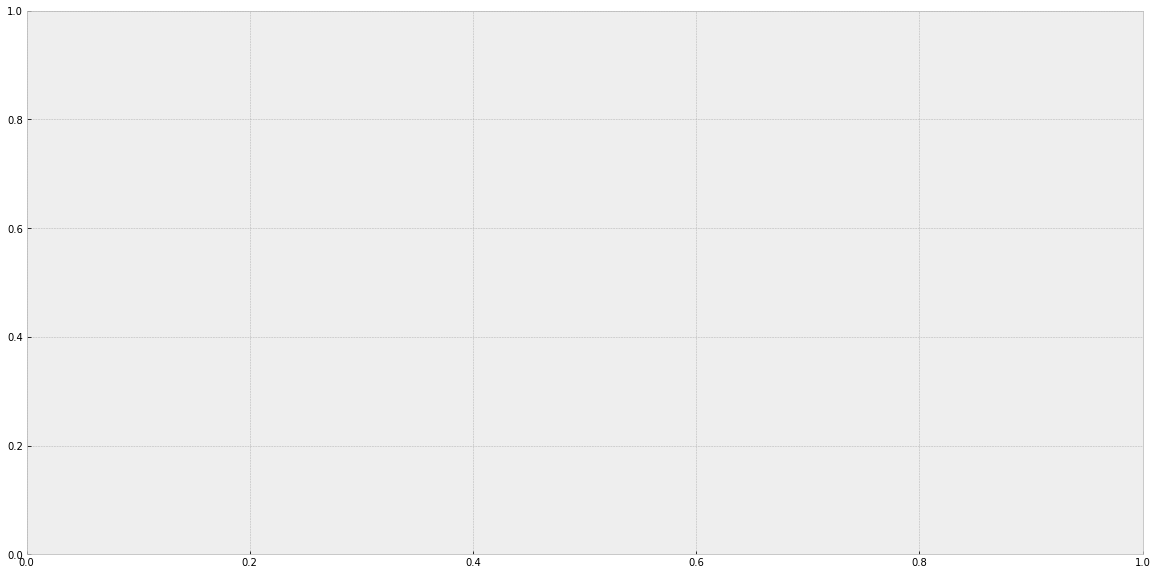

In [55]:
#df = energy[['KWH JANUARY 2010', 'KWH FEBRUARY 2010']].dropna() #, 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010']].dropna()
fig, ax = plt.subplots(figsize=[20, 10])
hst     = ax.hist(energy.dropna())
xlab = ax.set_xlabel('stuff')

ylab = ax.set_xlabel('number')




TypeError: ignored

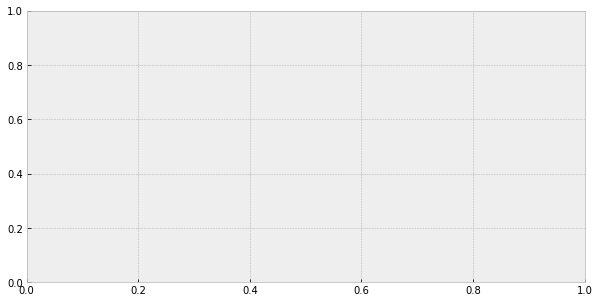

In [33]:
# -- determine range, mean, median, and std of numerical columns
#for stat in ['min', 'max', 'mean', 'median']:
#  print('{} {} \t: {}'.format(item[0], stat, eval("energy[item[0]].{}()".format(stat))))
#  print("")
  
# -- plot histogram for each stat group
fig, ax = plt.subplots(figsize=[10, 5])
# hst     = ax.hist(energy[['KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010']], bins=100)
hst     = ax.hist(energy, bins=100)
xlab    = ax.set_xlabel("")
ylab    = ax.set_ylabel("number of days")


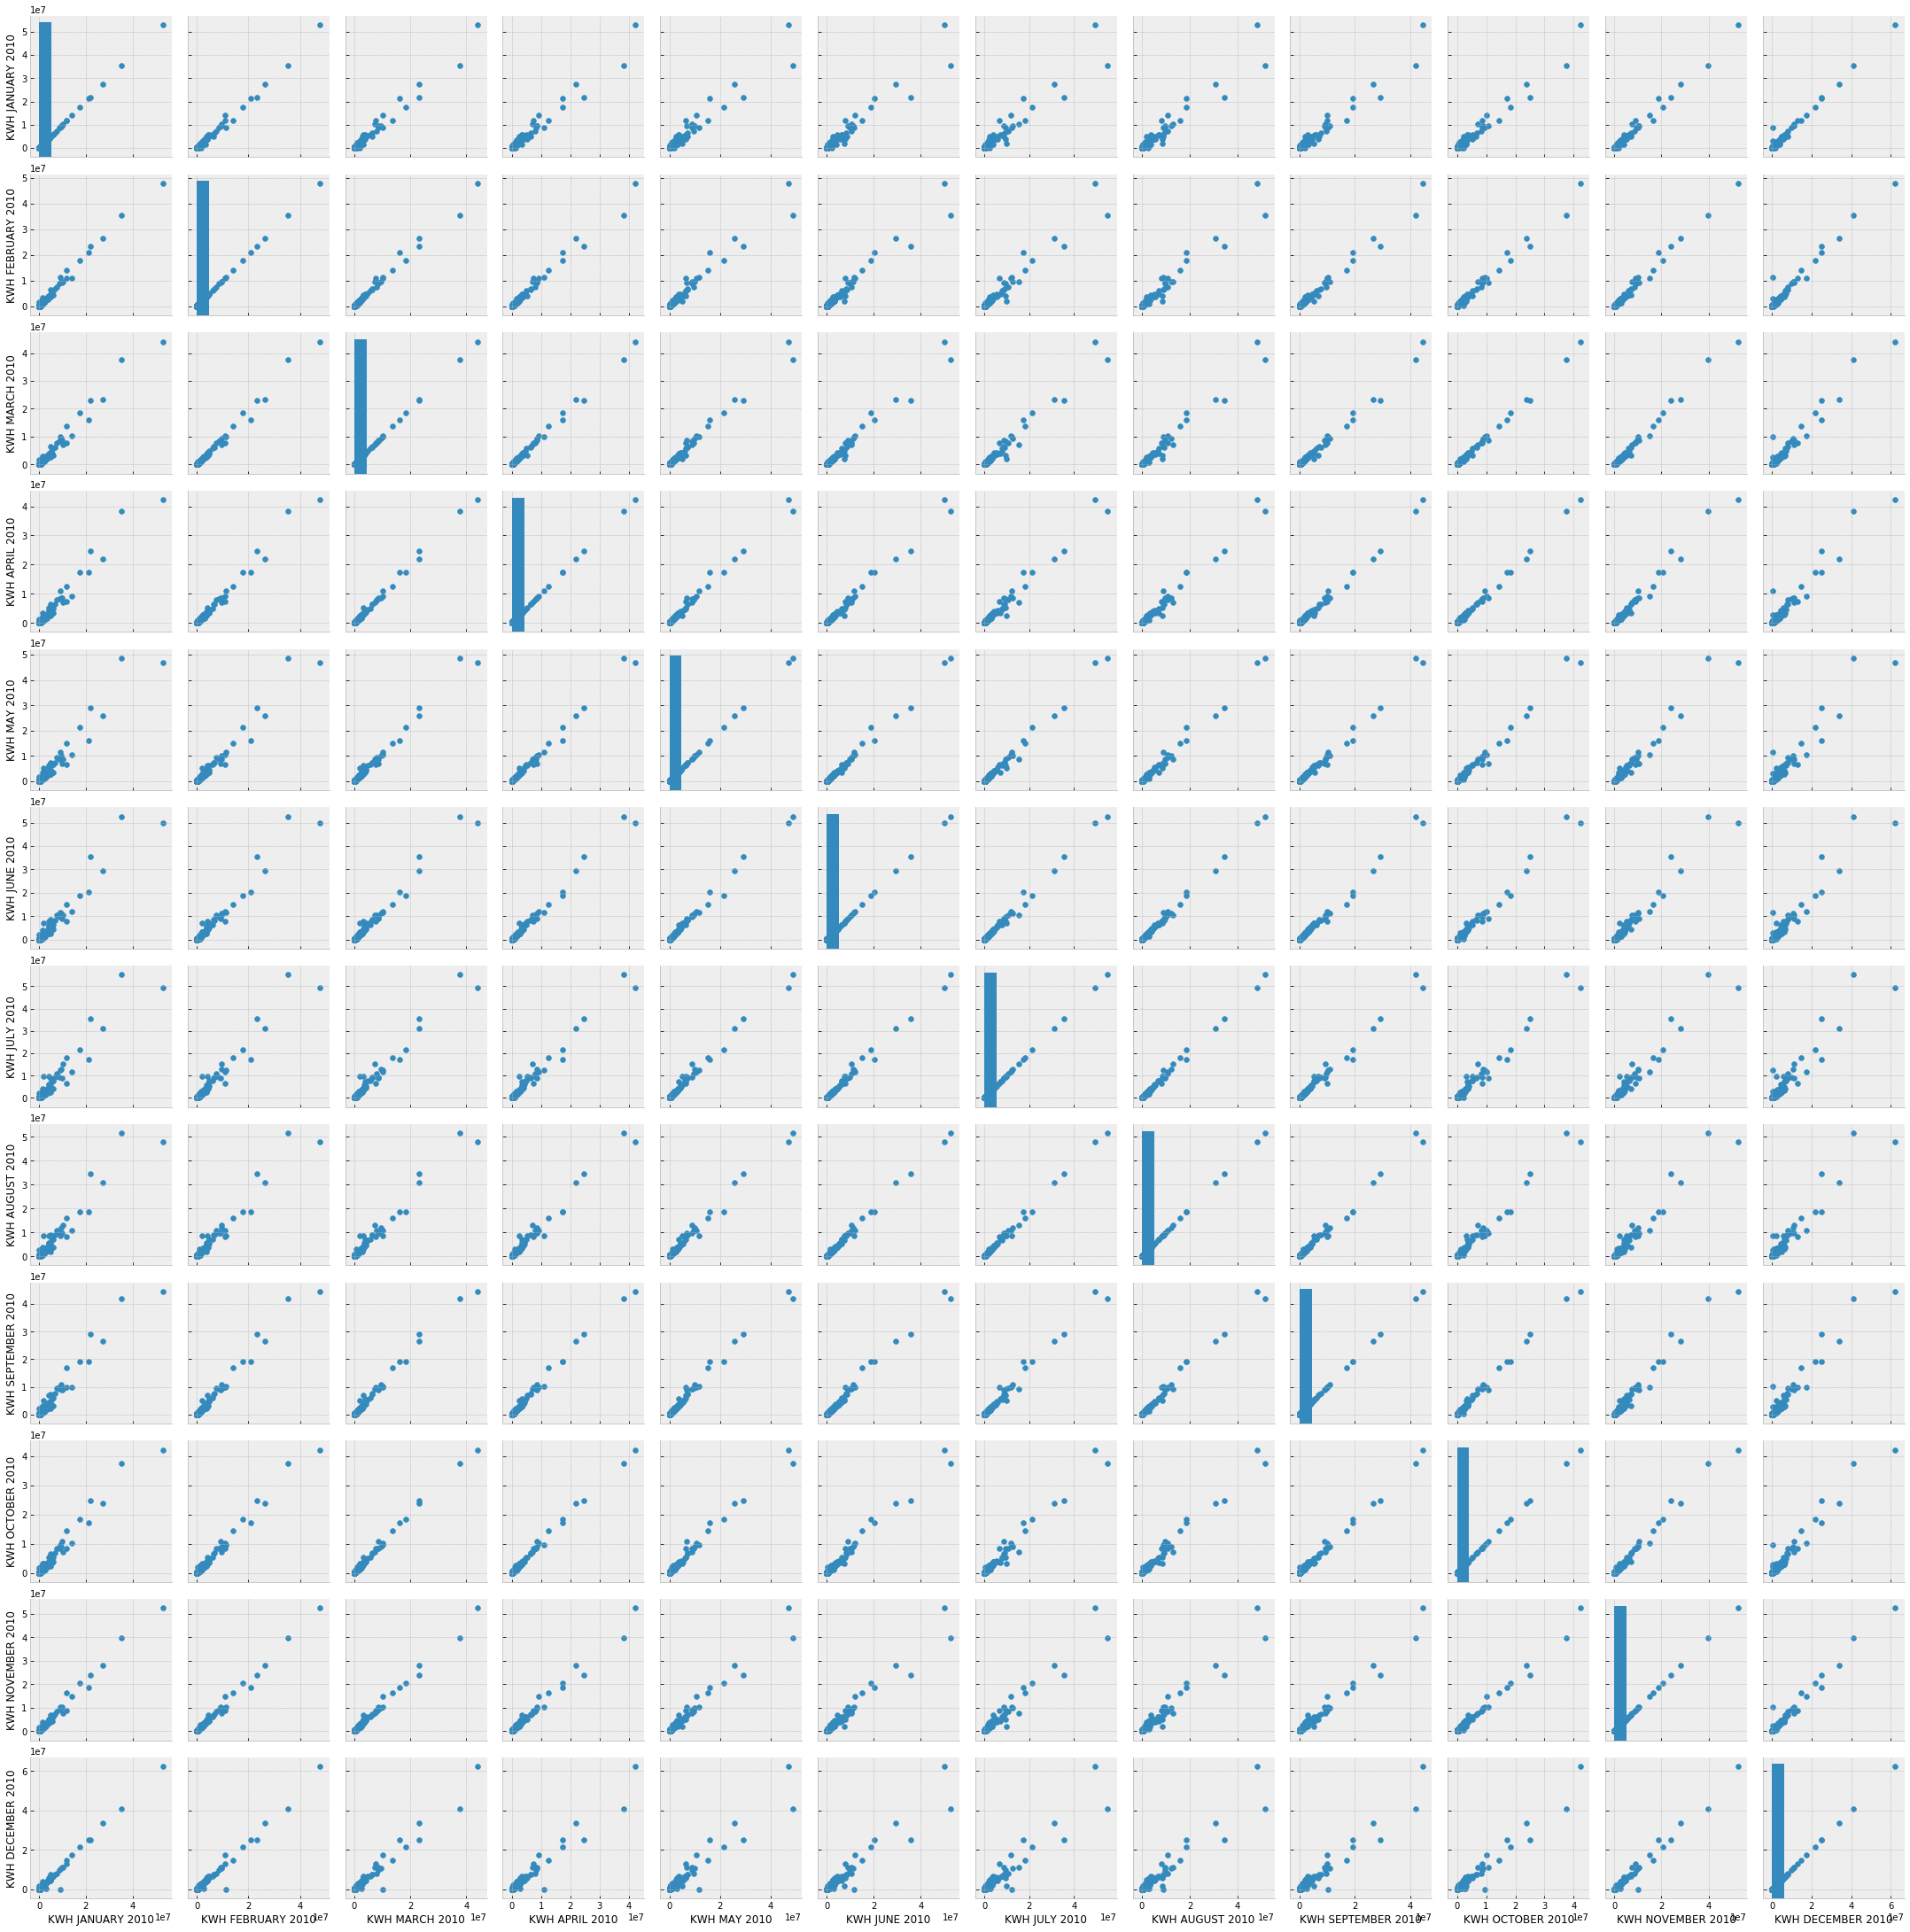

In [56]:
df = energy[['KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010']].dropna()
g = sns.pairplot(df)
g.map(plt.scatter)

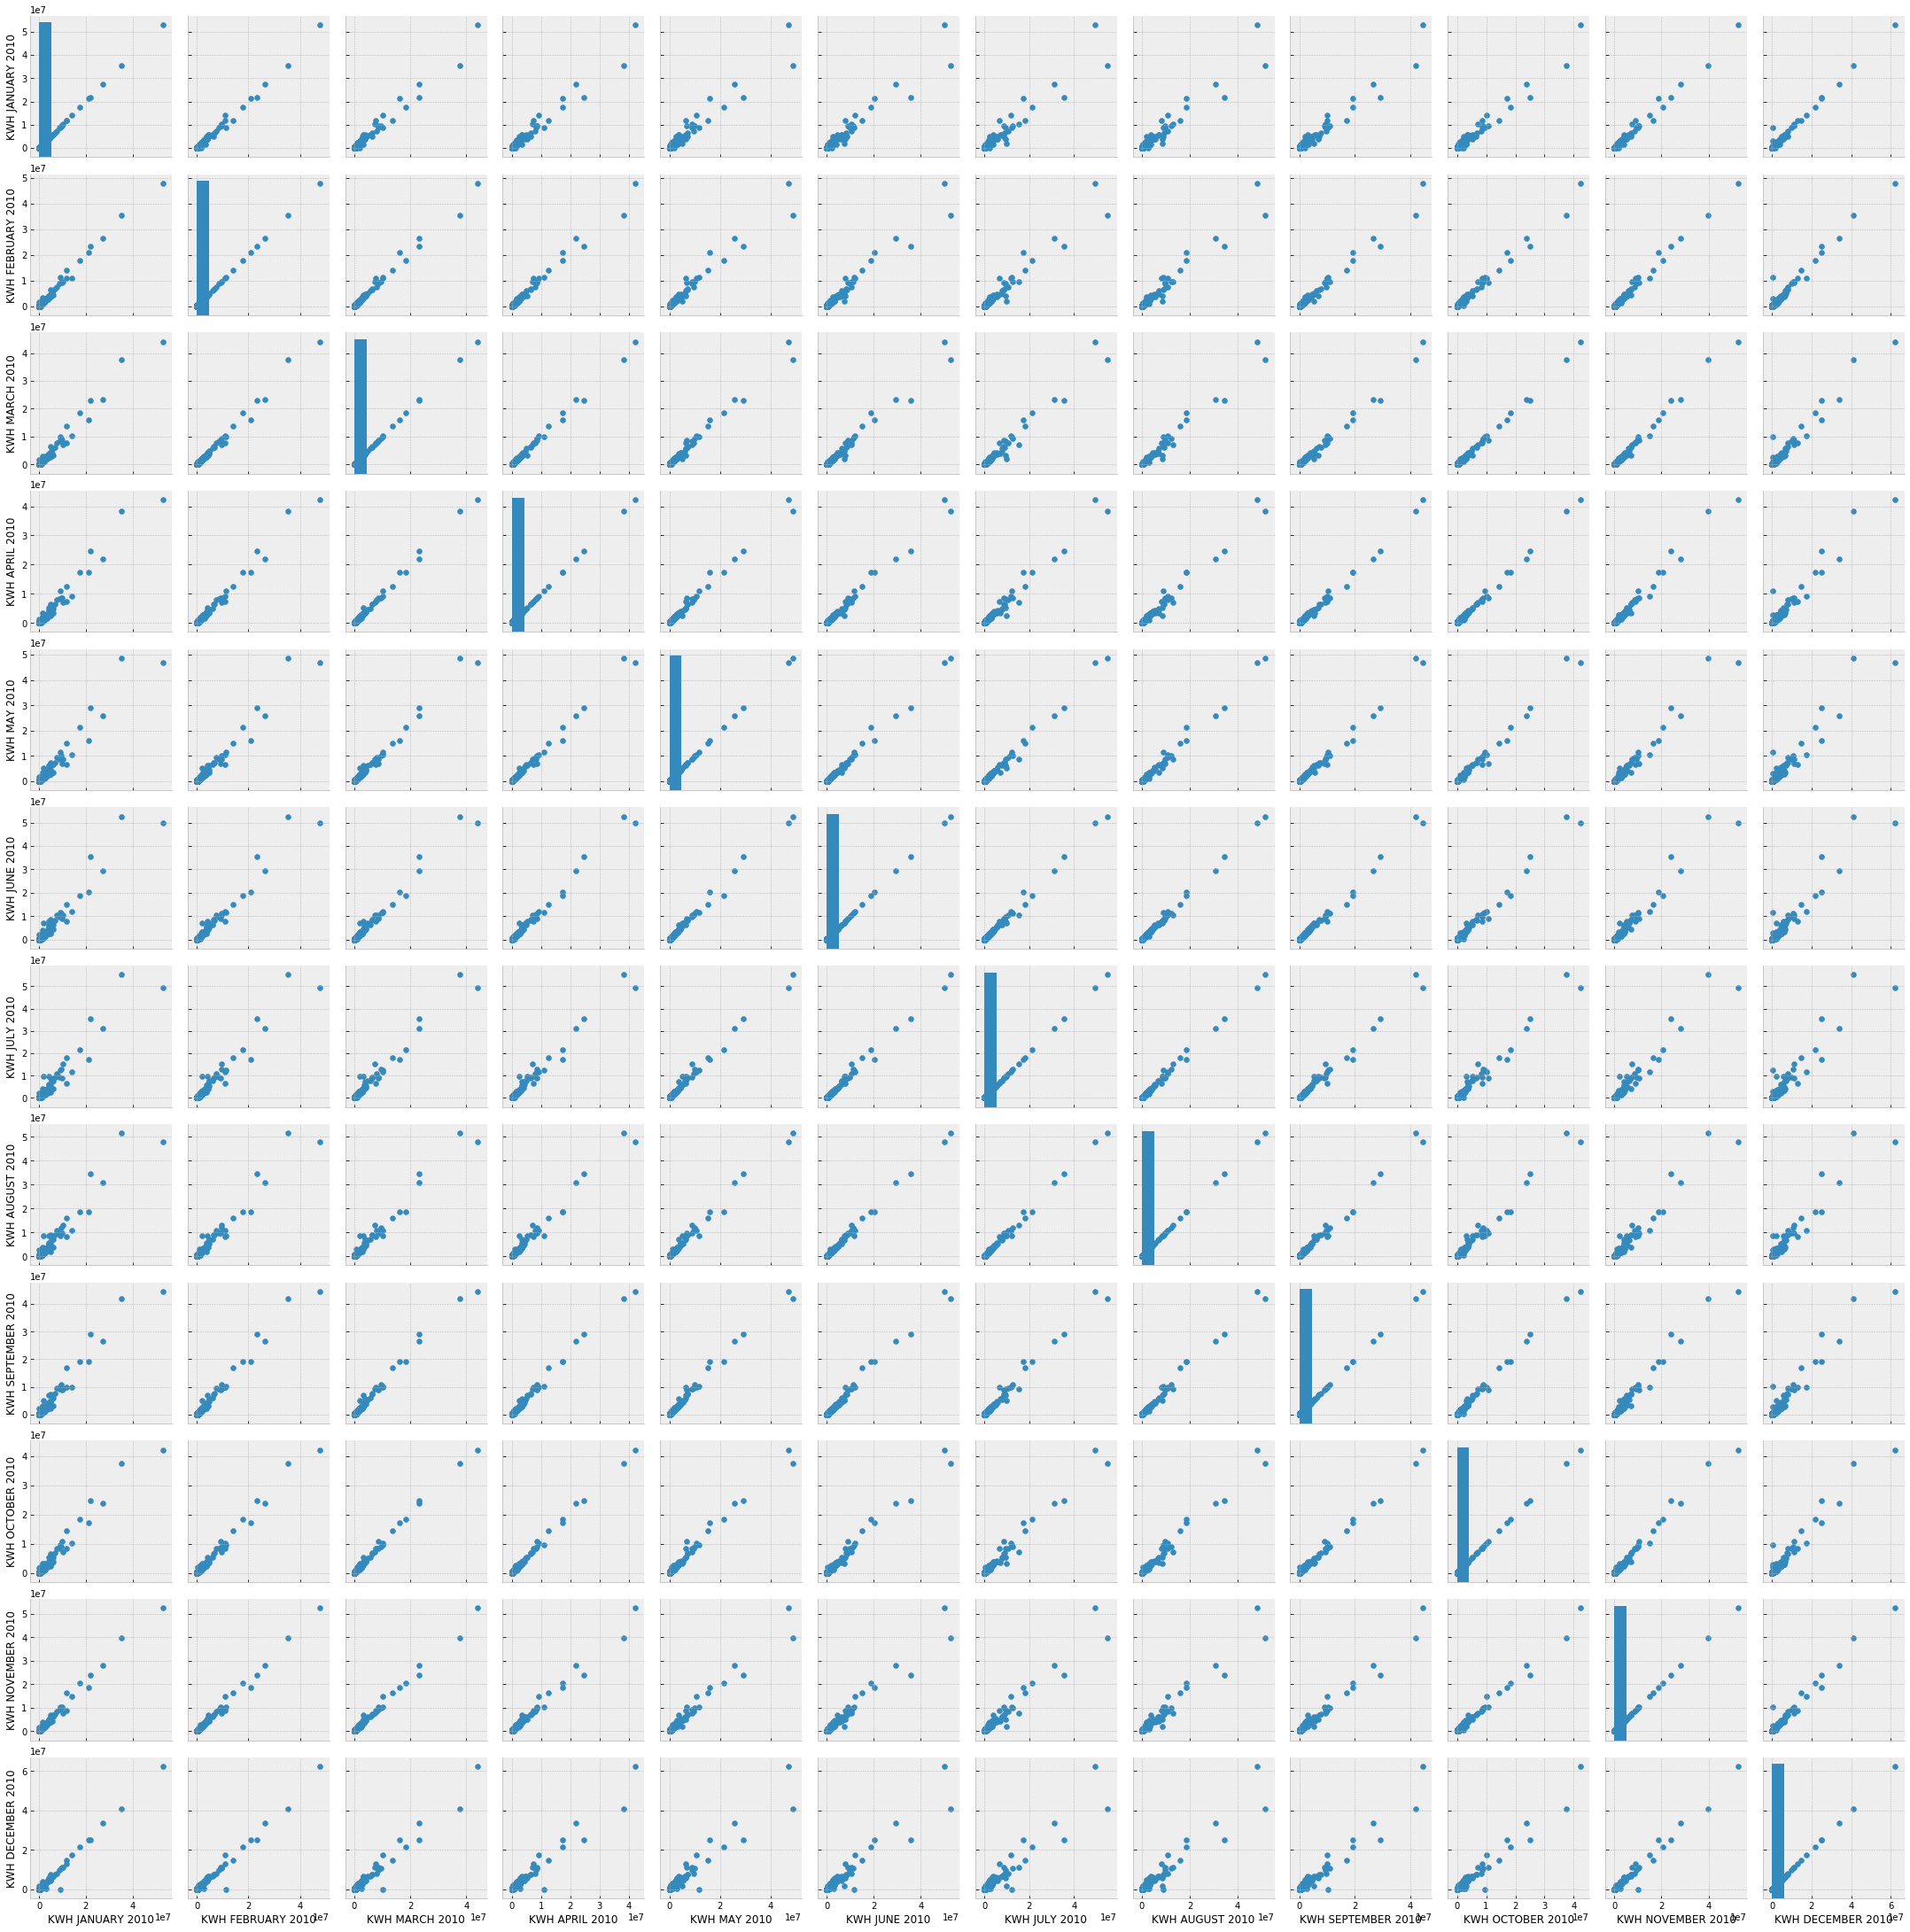

In [57]:
df = energy[['KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010']].dropna()
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map(plt.scatter)

KeyError: ignored

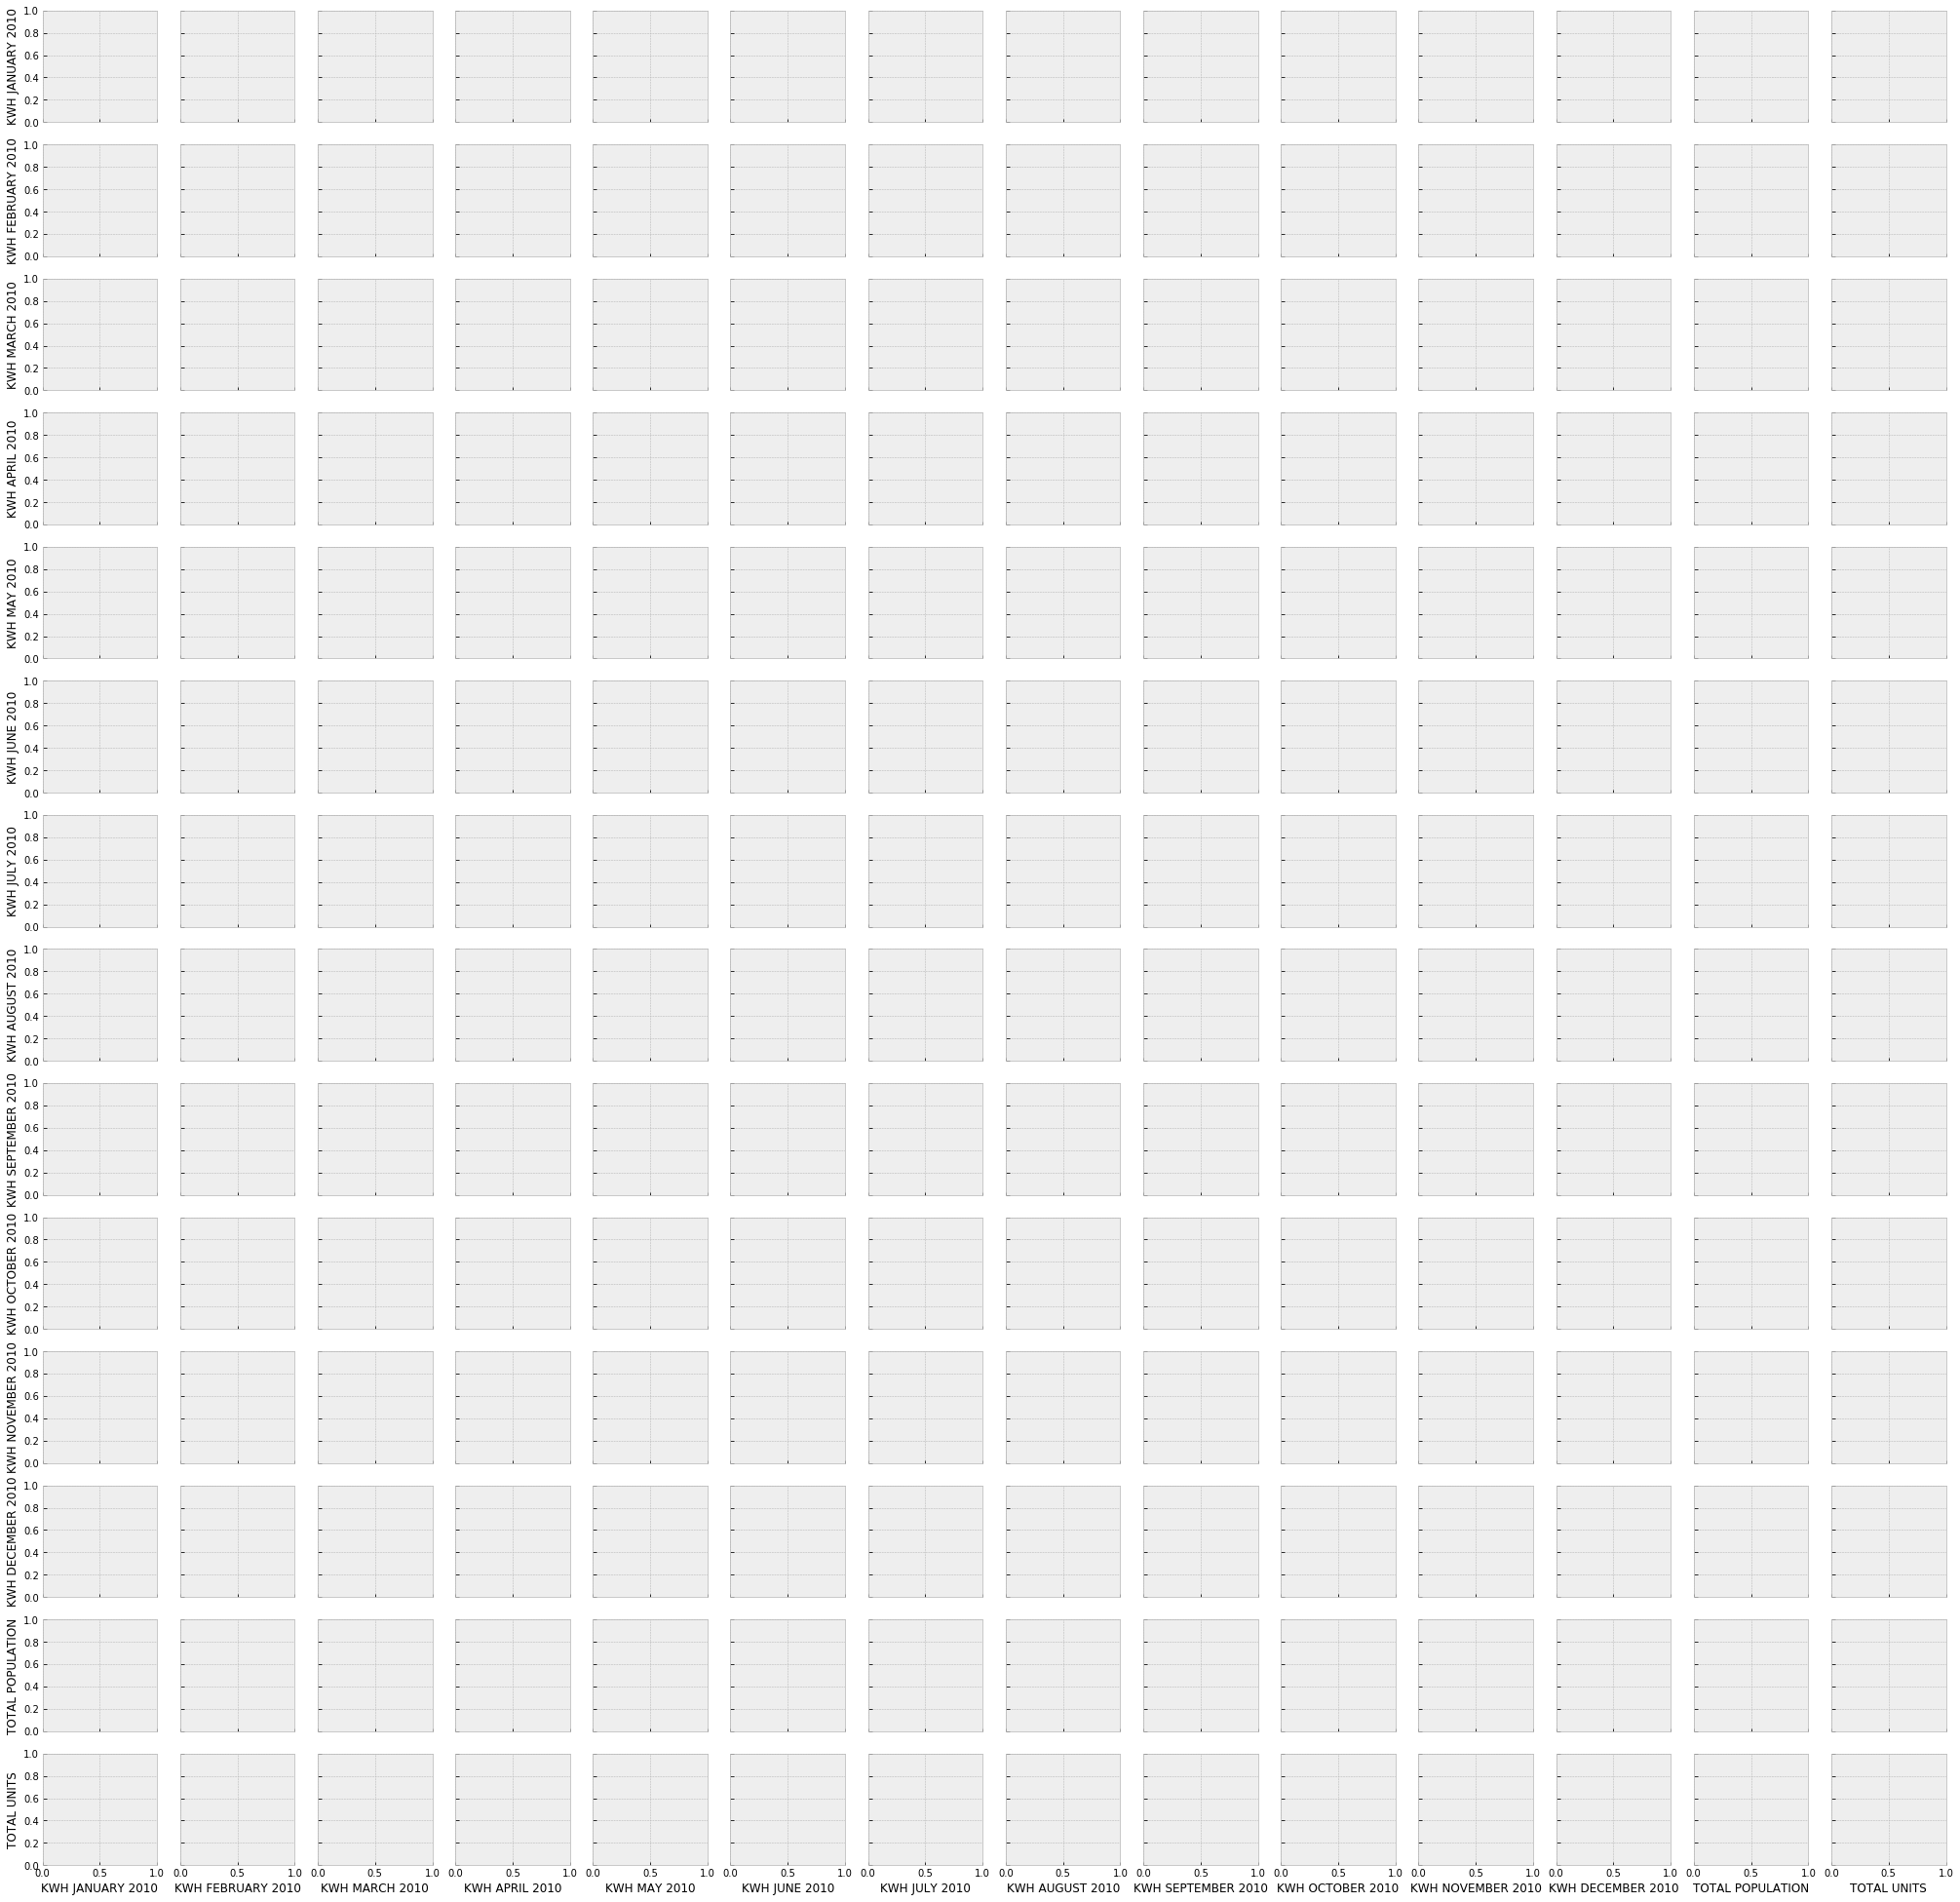

In [30]:
sns.pairplot(energy[['KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010', 'TOTAL POPULATION', 'TOTAL UNITS']], hue='TOTAL POPULATION')

In [217]:
eval("energy[item[0]].{}()".format('min'))

0.0

In [0]:
energy.dtypes.values[10] == float# np.dtype('float64')

True

In [0]:
set(energy.dtypes.values)

{dtype('int64'), dtype('float64'), dtype('O')}

In [0]:
energy.describe().columns

Index(['CENSUS BLOCK', 'KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010', 'TOTAL KWH', 'ZERO KWH ACCOUNTS', 'THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010', 'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010', 'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010', 'THERM OCTOBER 2010',
       'THERM NOVEMBER 2010', 'THERM DECEMBER 2010', 'TOTAL THERMS', 'KWH TOTAL SQFT', 'THERMS TOTAL SQFT', 'KWH MEAN 2010', 'KWH STANDARD DEVIATION 2010', 'KWH MINIMUM 2010', 'KWH 1ST QUARTILE 2010', 'KWH 2ND QUARTILE 2010', 'KWH 3RD QUARTILE 2010', 'KWH MAXIMUM 2010', 'KWH SQFT MEAN 2010', 'KWH SQFT STANDARD DEVIATION 2010', 'KWH SQFT MINIMUM 2010', 'KWH SQFT 1ST QUARTILE 2010', 'KWH SQFT 2ND QUARTILE 2010', 'KWH SQFT 3RD QUARTILE 2010', 'KWH SQFT MAXIMUM 2010', 'THERM MEAN 2010',
       'THERM STAN

In [0]:
# -- Describe the dataset
def describe(df):
  # -- compute range, mean, median, and std 




a = energy.isna().sum(axis=0)

In [0]:
display(a)

COMMUNITY AREA NAME                      0
CENSUS BLOCK                            77
BUILDING TYPE                           77
BUILDING_SUBTYPE                        77
KWH JANUARY 2010                       871
                                      ... 
OCCUPIED UNITS                          14
OCCUPIED UNITS PERCENTAGE             2445
RENTER-OCCUPIED HOUSING UNITS           14
RENTER-OCCUPIED HOUSING PERCENTAGE    2618
OCCUPIED HOUSING UNITS                  14
Length: 73, dtype: int64

In [0]:
print('bye')

bye


In [202]:
energy.dtypes/

## Census Tract

# 2) Data description and summary

## Explore the economic and social dimension of the problem by 

### combining energy consumption data in Chicago with data from the Census on population characteristics by Census Tract 

> (note, the consumption data exists at the census block level, but being well versed in the census, you know that census block estimates have significant uncertainty, and so the decision is made to focus on the Census Tract level).

# 3) Analysis and visualizations

## how usage characteristics of the population scales with social and economic factors

## https://ourworldindata.org/grapher/energy-use-per-capita-vs-gdp-per-capita

## create a model for future population growth and infrastructure

# 4) Summary of findings